## County Health Rankings
Data drawn from census.gov

### Outline
    A. Set up
       1. Import dependencies and data files
       2. Read data files into data frames
    B. Calculate employment growth rate
       3. Merge 2020 and 2015 employment numbers into the main data frame and delete extra columns
       4. Compute Employment growth rate
       5. Check growth rates for reasonability
       6. Plot rates to see if they look like a normal distribution
    C. Clean/Preprocess Data for Regression Analysis
       7. Check for null values, clean where appropriate
       8. Check data types, convert to numeric where needed
       9. Check for outlier data
    D. Perform Multiple Linear Regression and Examine Results
      10. Reshape data into an array (num_samples, num_features)
      11. Define X (independent variables) and y (dependent variable)
      12. Create and fit the model
      13. Print intercept, slope, r and r^2 for each factor
    E. Analysis of Regression
      14. Examine outputs and determine which factors are most predictive
    F. Other Methods - Polynomial regression, random forest ensemble model?
   

## Set Up

In [218]:
# 1. Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#set print to 20 (for rerunning so it's not set at none)
pd.set_option('display.max_rows', 20)

In [219]:
#2. Import data files
#Set path of input file
main_data = "Resources/combined_ratings.csv"
data_2020 = "Resources/DP03_counties_2020.csv"
data_2015 = "Resources/DP03_counties_2015.csv"

In [220]:
#Read combined ratings data file into a DataFrame
combined_ratings_df = pd.read_csv(main_data)
combined_ratings_df

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% 65 and over,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural
0,1000,Alabama,NaN,81791.0,9943.0,22,4.9,4.9,10.0,21,...,16.9,26.5,0.7,1.5,0.1,4.4,65.4,1,51.6,41.0
1,1001,Alabama,Autauga,791.0,8129.0,21,4.7,4.7,9.0,18,...,15.6,19.3,0.5,1.2,0.1,3.0,74.3,1,51.4,42.0
2,1003,Alabama,Baldwin,2967.0,7354.0,18,4.2,4.3,8.0,17,...,20.4,8.8,0.8,1.2,0.1,4.6,83.1,1,51.5,42.3
3,1005,Alabama,Barbour,472.0,10254.0,30,5.4,5.2,11.0,22,...,19.4,48.0,0.7,0.5,0.2,4.3,45.6,2,47.2,67.8
4,1007,Alabama,Bibb,471.0,11978.0,19,4.6,4.6,10.0,19,...,16.5,21.1,0.4,0.2,0.1,2.6,74.6,0,46.8,68.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,532.0,7832.0,15,3.4,3.6,10.0,18,...,12.1,1.1,1.5,1.0,0.2,16.1,79.3,2,48.5,10.9
3189,56039,Wyoming,Teton,109.0,2731.0,12,3.0,3.2,8.0,15,...,15.4,0.6,0.9,1.4,0.2,14.9,81.5,4,48.4,46.4
3190,56041,Wyoming,Uinta,256.0,7331.0,16,3.6,3.7,10.0,17,...,14.1,0.7,1.4,0.5,0.1,9.2,87.4,1,49.3,43.1
3191,56043,Wyoming,Washakie,110.0,6586.0,16,3.6,3.7,7.0,17,...,21.7,0.5,1.8,0.8,0.1,14.1,82.4,0,49.4,36.0


In [221]:
#Read 2020 DP03 data file into a DataFrame
data_2020_df = pd.read_csv(data_2020)
data_2020_df

,NAME,GEO_ID,FIPS,Employed 2020
0,"Autauga County, Alabama",0500000US01001,1001,24580
1,"Baldwin County, Alabama",0500000US01003,1003,98768
2,"Barbour County, Alabama",0500000US01005,1005,8707
3,"Bibb County, Alabama",0500000US01007,1007,8303
4,"Blount County, Alabama",0500000US01009,1009,22836
...,...,...,...,...
3216,"Renville County, Minnesota",0500000US27129,27129,6997
3217,"Roseau County, Minnesota",0500000US27135,27135,8019
3218,"Sherburne County, Minnesota",0500000US27141,27141,52213
3219,"Steele County, Minnesota",0500000US27147,27147,18725


In [222]:
#Read 2015 DP03 data file into a DataFrame
data_2015_df = pd.read_csv(data_2015)
data_2015_df

,NAME,GEO_ID,FIPS,Employed 2015
0,"Childress County, Texas",0500000US48075,48075,2600
1,"Comal County, Texas",0500000US48091,48091,54190
2,"Houston County, Texas",0500000US48225,48225,7694
3,"Navarro County, Texas",0500000US48349,48349,20159
4,"Scurry County, Texas",0500000US48415,48415,7371
...,...,...,...,...
3215,"Charlotte County, Virginia",0500000US51037,51037,5266
3216,"Burleson County, Texas",0500000US48051,48051,7352
3217,"Greensville County, Virginia",0500000US51081,51081,3365
3218,"Thurston County, Washington",0500000US53067,53067,119123


## Calculate Employment Growth Rate

In [223]:
# 3a. Merge 2015 employment count into combined ratings dataframe
combined_ratings_df = combined_ratings_df.merge(data_2015_df,on=["FIPS","FIPS"],how = 'left')
combined_ratings_df

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,NAME,GEO_ID,Employed 2015
0,1000,Alabama,NaN,81791.0,9943.0,22,4.9,4.9,10.0,21,...,1.5,0.1,4.4,65.4,1,51.6,41.0,NaN,NaN,NaN
1,1001,Alabama,Autauga,791.0,8129.0,21,4.7,4.7,9.0,18,...,1.2,0.1,3.0,74.3,1,51.4,42.0,"Autauga County, Alabama",0500000US01001,23986.0
2,1003,Alabama,Baldwin,2967.0,7354.0,18,4.2,4.3,8.0,17,...,1.2,0.1,4.6,83.1,1,51.5,42.3,"Baldwin County, Alabama",0500000US01003,85953.0
3,1005,Alabama,Barbour,472.0,10254.0,30,5.4,5.2,11.0,22,...,0.5,0.2,4.3,45.6,2,47.2,67.8,"Barbour County, Alabama",0500000US01005,8597.0
4,1007,Alabama,Bibb,471.0,11978.0,19,4.6,4.6,10.0,19,...,0.2,0.1,2.6,74.6,0,46.8,68.4,"Bibb County, Alabama",0500000US01007,8294.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,532.0,7832.0,15,3.4,3.6,10.0,18,...,1.0,0.2,16.1,79.3,2,48.5,10.9,"Sweetwater County, Wyoming",0500000US56037,23010.0
3189,56039,Wyoming,Teton,109.0,2731.0,12,3.0,3.2,8.0,15,...,1.4,0.2,14.9,81.5,4,48.4,46.4,"Teton County, Wyoming",0500000US56039,14298.0
3190,56041,Wyoming,Uinta,256.0,7331.0,16,3.6,3.7,10.0,17,...,0.5,0.1,9.2,87.4,1,49.3,43.1,"Uinta County, Wyoming",0500000US56041,10064.0
3191,56043,Wyoming,Washakie,110.0,6586.0,16,3.6,3.7,7.0,17,...,0.8,0.1,14.1,82.4,0,49.4,36.0,"Washakie County, Wyoming",0500000US56043,3892.0


In [224]:
# 3b. Merge 2020 employment count into combined ratings dataframe
combined_ratings_df = combined_ratings_df.merge(data_2020_df,on=["FIPS","FIPS"],how = 'left')
combined_ratings_df

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,NAME_x,GEO_ID_x,Employed 2015,NAME_y,GEO_ID_y,Employed 2020
0,1000,Alabama,NaN,81791.0,9943.0,22,4.9,4.9,10.0,21,...,65.4,1,51.6,41.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,Alabama,Autauga,791.0,8129.0,21,4.7,4.7,9.0,18,...,74.3,1,51.4,42.0,"Autauga County, Alabama",0500000US01001,23986.0,"Autauga County, Alabama",0500000US01001,24580.0
2,1003,Alabama,Baldwin,2967.0,7354.0,18,4.2,4.3,8.0,17,...,83.1,1,51.5,42.3,"Baldwin County, Alabama",0500000US01003,85953.0,"Baldwin County, Alabama",0500000US01003,98768.0
3,1005,Alabama,Barbour,472.0,10254.0,30,5.4,5.2,11.0,22,...,45.6,2,47.2,67.8,"Barbour County, Alabama",0500000US01005,8597.0,"Barbour County, Alabama",0500000US01005,8707.0
4,1007,Alabama,Bibb,471.0,11978.0,19,4.6,4.6,10.0,19,...,74.6,0,46.8,68.4,"Bibb County, Alabama",0500000US01007,8294.0,"Bibb County, Alabama",0500000US01007,8303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,532.0,7832.0,15,3.4,3.6,10.0,18,...,79.3,2,48.5,10.9,"Sweetwater County, Wyoming",0500000US56037,23010.0,"Sweetwater County, Wyoming",0500000US56037,21572.0
3189,56039,Wyoming,Teton,109.0,2731.0,12,3.0,3.2,8.0,15,...,81.5,4,48.4,46.4,"Teton County, Wyoming",0500000US56039,14298.0,"Teton County, Wyoming",0500000US56039,14909.0
3190,56041,Wyoming,Uinta,256.0,7331.0,16,3.6,3.7,10.0,17,...,87.4,1,49.3,43.1,"Uinta County, Wyoming",0500000US56041,10064.0,"Uinta County, Wyoming",0500000US56041,9710.0
3191,56043,Wyoming,Washakie,110.0,6586.0,16,3.6,3.7,7.0,17,...,82.4,0,49.4,36.0,"Washakie County, Wyoming",0500000US56043,3892.0,"Washakie County, Wyoming",0500000US56043,3841.0


In [225]:
# 3c. Drop extra columns
combined_ratings_df = combined_ratings_df.drop(columns=['NAME_x','NAME_y','GEO_ID_x','GEO_ID_y'])
combined_ratings_df

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020
0,1000,Alabama,NaN,81791.0,9943.0,22,4.9,4.9,10.0,21,...,0.7,1.5,0.1,4.4,65.4,1,51.6,41.0,NaN,NaN
1,1001,Alabama,Autauga,791.0,8129.0,21,4.7,4.7,9.0,18,...,0.5,1.2,0.1,3.0,74.3,1,51.4,42.0,23986.0,24580.0
2,1003,Alabama,Baldwin,2967.0,7354.0,18,4.2,4.3,8.0,17,...,0.8,1.2,0.1,4.6,83.1,1,51.5,42.3,85953.0,98768.0
3,1005,Alabama,Barbour,472.0,10254.0,30,5.4,5.2,11.0,22,...,0.7,0.5,0.2,4.3,45.6,2,47.2,67.8,8597.0,8707.0
4,1007,Alabama,Bibb,471.0,11978.0,19,4.6,4.6,10.0,19,...,0.4,0.2,0.1,2.6,74.6,0,46.8,68.4,8294.0,8303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,532.0,7832.0,15,3.4,3.6,10.0,18,...,1.5,1.0,0.2,16.1,79.3,2,48.5,10.9,23010.0,21572.0
3189,56039,Wyoming,Teton,109.0,2731.0,12,3.0,3.2,8.0,15,...,0.9,1.4,0.2,14.9,81.5,4,48.4,46.4,14298.0,14909.0
3190,56041,Wyoming,Uinta,256.0,7331.0,16,3.6,3.7,10.0,17,...,1.4,0.5,0.1,9.2,87.4,1,49.3,43.1,10064.0,9710.0
3191,56043,Wyoming,Washakie,110.0,6586.0,16,3.6,3.7,7.0,17,...,1.8,0.8,0.1,14.1,82.4,0,49.4,36.0,3892.0,3841.0


In [226]:
# 3d. Check for missing values in newly imported employment data
print(f"There are {combined_ratings_df['Employed 2020'].isna().sum()} missing values in the 2020 employment data")
print(f"There are {combined_ratings_df['Employed 2015'].isna().sum()} missing values in the 2015 employment data")

There are 52 missing values in the 2020 employment data
There are 51 missing values in the 2015 employment data


In [227]:
#Missing Values are likely from state only rows in original data, these rows should be eliminated anyway since
#our analysis is by county

#Verify who is missing that data
pd.set_option('display.max_rows', None)

missing_2020 = combined_ratings_df.loc[combined_ratings_df['Employed 2020'].isna()]
missing_2020

#50 states plus DC make 51 of 52, plus there is a problem with Valdez-Cordova County, Alaska

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020
0,1000,Alabama,NaN,81791.0,9943.0,22,4.9,4.9,10.0,21,...,0.7,1.5,0.1,4.4,65.4,1,51.6,41.0,NaN,NaN
68,2000,Alaska,NaN,8336.0,8049.0,18,4.0,3.9,6.0,21,...,15.4,6.6,1.4,7.2,60.3,2,47.9,34.0,NaN,NaN
94,2261,Alaska,Valdez-Cordova,109.0,7321.0,12,3.1,3.2,5.0,17,...,14.2,4.8,0.6,5.3,69.1,0,47.6,100.0,4415.0,NaN
98,4000,Arizona,NaN,80394.0,7075.0,19,4.0,4.0,7.0,16,...,5.3,3.7,0.3,31.6,54.4,5,50.3,10.2,NaN,NaN
114,5000,Arkansas,NaN,48017.0,9449.0,23,5.1,5.4,9.0,22,...,1.0,1.7,0.4,7.7,72.2,2,50.9,43.8,NaN,NaN
190,6000,California,NaN,347916.0,5260.0,17,3.5,3.5,7.0,11,...,1.6,15.3,0.5,39.3,36.8,10,50.3,5.0,NaN,NaN
249,8000,Colorado,NaN,52817.0,5944.0,14,3.4,3.8,9.0,15,...,1.6,3.5,0.2,21.7,67.9,3,49.6,13.8,NaN,NaN
314,9000,Connecticut,NaN,35163.0,5674.0,14,3.3,3.5,8.0,13,...,0.6,4.9,0.1,16.5,66.5,4,51.2,12.0,NaN,NaN
323,10000,Delaware,NaN,12674.0,7777.0,18,3.7,4.3,9.0,17,...,0.7,4.1,0.1,9.5,61.9,2,51.6,16.7,NaN,NaN
327,11000,District of Columbia,NaN,8387.0,8111.0,13,2.9,3.6,10.0,16,...,0.6,4.4,0.1,11.3,37.1,2,52.6,0.0,NaN,NaN


In [228]:
#Check 2015 missing data
missing_2015 = combined_ratings_df.loc[combined_ratings_df['Employed 2015'].isna()]
missing_2015
#Valdez-Cordova Alaska not missing in 2015 data, 50 states plus DC appear here.

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020
0,1000,Alabama,NaN,81791.0,9943.0,22,4.9,4.9,10.0,21,...,0.7,1.5,0.1,4.4,65.4,1,51.6,41.0,NaN,NaN
68,2000,Alaska,NaN,8336.0,8049.0,18,4.0,3.9,6.0,21,...,15.4,6.6,1.4,7.2,60.3,2,47.9,34.0,NaN,NaN
98,4000,Arizona,NaN,80394.0,7075.0,19,4.0,4.0,7.0,16,...,5.3,3.7,0.3,31.6,54.4,5,50.3,10.2,NaN,NaN
114,5000,Arkansas,NaN,48017.0,9449.0,23,5.1,5.4,9.0,22,...,1.0,1.7,0.4,7.7,72.2,2,50.9,43.8,NaN,NaN
190,6000,California,NaN,347916.0,5260.0,17,3.5,3.5,7.0,11,...,1.6,15.3,0.5,39.3,36.8,10,50.3,5.0,NaN,NaN
249,8000,Colorado,NaN,52817.0,5944.0,14,3.4,3.8,9.0,15,...,1.6,3.5,0.2,21.7,67.9,3,49.6,13.8,NaN,NaN
314,9000,Connecticut,NaN,35163.0,5674.0,14,3.3,3.5,8.0,13,...,0.6,4.9,0.1,16.5,66.5,4,51.2,12.0,NaN,NaN
323,10000,Delaware,NaN,12674.0,7777.0,18,3.7,4.3,9.0,17,...,0.7,4.1,0.1,9.5,61.9,2,51.6,16.7,NaN,NaN
327,11000,District of Columbia,NaN,8387.0,8111.0,13,2.9,3.6,10.0,16,...,0.6,4.4,0.1,11.3,37.1,2,52.6,0.0,NaN,NaN
329,12000,Florida,NaN,263456.0,7260.0,17,3.7,4.0,9.0,16,...,0.5,3.0,0.1,26.1,53.5,7,51.1,8.8,NaN,NaN


In [229]:
#Double check census data for Valdez-Cordova, Alaska and fill in 2019 data if necessary
pd.set_option('display.max_rows', 10)
#Look at Valdez-Cordova, Alaska by itself
valdez_cordova = combined_ratings_df.loc[combined_ratings_df["County"]=="Valdez-Cordova"]
valdez_cordova

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020
94,2261,Alaska,Valdez-Cordova,109.0,7321.0,12,3.1,3.2,5.0,17,...,14.2,4.8,0.6,5.3,69.1,0,47.6,100.0,4415.0,NaN


In [230]:
#I doublechecked the census data, and the 2020 value is missing from the 5 year ACS. I pulled out the 2019
#data, 4846 and will use that to substitute for the missing values for Valdez-Cordova 
combined_ratings_df['Employed 2020'] = np.where(combined_ratings_df["County"]=='Valdez-Cordova',4846,combined_ratings_df['Employed 2020'])
combined_ratings_df.loc[combined_ratings_df['County']=="Valdez-Cordova"]

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020
94,2261,Alaska,Valdez-Cordova,109.0,7321.0,12,3.1,3.2,5.0,17,...,14.2,4.8,0.6,5.3,69.1,0,47.6,100.0,4415.0,4846.0


In [231]:
#Investigate how DC is handled 
dc_data = combined_ratings_df.loc[combined_ratings_df['State']=="District of Columbia"]
dc_data
#Since there is a total row as for the states and a single row for just the city, we should delete the total row
#when we are deleting the state total rows

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020
327,11000,District of Columbia,NaN,8387.0,8111.0,13,2.9,3.6,10.0,16,...,0.6,4.4,0.1,11.3,37.1,2,52.6,0.0,NaN,NaN
328,11001,District of Columbia,District of Columbia,8387.0,8111.0,13,2.9,3.6,10.0,16,...,0.6,4.4,0.1,11.3,37.1,2,52.6,0.0,337815.0,382108.0


In [232]:
#Remove rows that are state totals
#Make a group of the rows to drop
state_rows = combined_ratings_df.loc[combined_ratings_df['Employed 2020'].isna()]
state_rows

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020
0,1000,Alabama,NaN,81791.0,9943.0,22,4.9,4.9,10.0,21,...,0.7,1.5,0.1,4.4,65.4,1,51.6,41.0,NaN,NaN
68,2000,Alaska,NaN,8336.0,8049.0,18,4.0,3.9,6.0,21,...,15.4,6.6,1.4,7.2,60.3,2,47.9,34.0,NaN,NaN
98,4000,Arizona,NaN,80394.0,7075.0,19,4.0,4.0,7.0,16,...,5.3,3.7,0.3,31.6,54.4,5,50.3,10.2,NaN,NaN
114,5000,Arkansas,NaN,48017.0,9449.0,23,5.1,5.4,9.0,22,...,1.0,1.7,0.4,7.7,72.2,2,50.9,43.8,NaN,NaN
190,6000,California,NaN,347916.0,5260.0,17,3.5,3.5,7.0,11,...,1.6,15.3,0.5,39.3,36.8,10,50.3,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,51000,Virginia,NaN,94324.0,6411.0,16,3.5,3.8,8.0,16,...,0.5,6.9,0.1,9.6,61.5,3,50.8,24.5,NaN,NaN
3000,53000,Washington,NaN,74525.0,5594.0,16,3.9,4.1,6.0,13,...,1.9,9.3,0.8,12.9,68.0,4,50.0,16.0,NaN,NaN
3040,54000,West Virginia,NaN,34459.0,10755.0,24,5.3,5.5,9.0,26,...,0.3,0.8,0.0,1.7,92.1,0,50.5,51.3,NaN,NaN
3096,55000,Wisconsin,NaN,63747.0,6366.0,17,3.9,4.0,7.0,16,...,1.2,3.0,0.1,6.9,81.1,1,50.2,29.8,NaN,NaN


In [233]:
# Use the indexes from the group of rows to drop, state_rows, to drop that row from combined_rating_df 
combined_ratings_df.drop(state_rows.index,inplace=True)
combined_ratings_df
#3193 - 51 = 3142 so count of rows is correct

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020
1,1001,Alabama,Autauga,791.0,8129.0,21,4.7,4.7,9.0,18,...,0.5,1.2,0.1,3.0,74.3,1,51.4,42.0,23986.0,24580.0
2,1003,Alabama,Baldwin,2967.0,7354.0,18,4.2,4.3,8.0,17,...,0.8,1.2,0.1,4.6,83.1,1,51.5,42.3,85953.0,98768.0
3,1005,Alabama,Barbour,472.0,10254.0,30,5.4,5.2,11.0,22,...,0.7,0.5,0.2,4.3,45.6,2,47.2,67.8,8597.0,8707.0
4,1007,Alabama,Bibb,471.0,11978.0,19,4.6,4.6,10.0,19,...,0.4,0.2,0.1,2.6,74.6,0,46.8,68.4,8294.0,8303.0
5,1009,Alabama,Blount,1085.0,11335.0,22,4.9,4.9,8.0,19,...,0.7,0.3,0.1,9.6,86.9,2,50.7,90.0,22189.0,22836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,532.0,7832.0,15,3.4,3.6,10.0,18,...,1.5,1.0,0.2,16.1,79.3,2,48.5,10.9,23010.0,21572.0
3189,56039,Wyoming,Teton,109.0,2731.0,12,3.0,3.2,8.0,15,...,0.9,1.4,0.2,14.9,81.5,4,48.4,46.4,14298.0,14909.0
3190,56041,Wyoming,Uinta,256.0,7331.0,16,3.6,3.7,10.0,17,...,1.4,0.5,0.1,9.2,87.4,1,49.3,43.1,10064.0,9710.0
3191,56043,Wyoming,Washakie,110.0,6586.0,16,3.6,3.7,7.0,17,...,1.8,0.8,0.1,14.1,82.4,0,49.4,36.0,3892.0,3841.0


In [234]:
#ACS data has 3221 rows and the combined ratings file has 3193 (51 states (including dc) and 3142 counties.)
#Just out of curiousity, who is in the ACS but not the combined ratings?

#Bring in original data again into a clean dataframe
original_df = pd.read_csv(main_data)
original_df

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% 65 and over,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural
0,1000,Alabama,NaN,81791.0,9943.0,22,4.9,4.9,10.0,21,...,16.9,26.5,0.7,1.5,0.1,4.4,65.4,1,51.6,41.0
1,1001,Alabama,Autauga,791.0,8129.0,21,4.7,4.7,9.0,18,...,15.6,19.3,0.5,1.2,0.1,3.0,74.3,1,51.4,42.0
2,1003,Alabama,Baldwin,2967.0,7354.0,18,4.2,4.3,8.0,17,...,20.4,8.8,0.8,1.2,0.1,4.6,83.1,1,51.5,42.3
3,1005,Alabama,Barbour,472.0,10254.0,30,5.4,5.2,11.0,22,...,19.4,48.0,0.7,0.5,0.2,4.3,45.6,2,47.2,67.8
4,1007,Alabama,Bibb,471.0,11978.0,19,4.6,4.6,10.0,19,...,16.5,21.1,0.4,0.2,0.1,2.6,74.6,0,46.8,68.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,532.0,7832.0,15,3.4,3.6,10.0,18,...,12.1,1.1,1.5,1.0,0.2,16.1,79.3,2,48.5,10.9
3189,56039,Wyoming,Teton,109.0,2731.0,12,3.0,3.2,8.0,15,...,15.4,0.6,0.9,1.4,0.2,14.9,81.5,4,48.4,46.4
3190,56041,Wyoming,Uinta,256.0,7331.0,16,3.6,3.7,10.0,17,...,14.1,0.7,1.4,0.5,0.1,9.2,87.4,1,49.3,43.1
3191,56043,Wyoming,Washakie,110.0,6586.0,16,3.6,3.7,7.0,17,...,21.7,0.5,1.8,0.8,0.1,14.1,82.4,0,49.4,36.0


In [235]:
#Merge original data with the 2020 employment data from ACS
find_unmatched_new = data_2020_df.merge(original_df,on=["FIPS","FIPS"],how = 'left')
acs_unmatched = find_unmatched_new.loc[find_unmatched_new['State'].isna()]
acs_unmatched_counts = acs_unmatched['NAME'].value_counts()
pd.set_option('display.max_rows', None)
acs_unmatched_counts
#All except one are in Puerto Rico, so it makes sense that they are in the census data but not the ratings data
#Could Chugach Census Area be a new name for Valdez-Cordova Census Area?

Chugach Census Area, Alaska             1
Adjuntas Municipio, Puerto Rico         1
Villalba Municipio, Puerto Rico         1
Vieques Municipio, Puerto Rico          1
Vega Baja Municipio, Puerto Rico        1
Utuado Municipio, Puerto Rico           1
Trujillo Alto Municipio, Puerto Rico    1
Toa Alta Municipio, Puerto Rico         1
Santa Isabel Municipio, Puerto Rico     1
San Lorenzo Municipio, Puerto Rico      1
San Juan Municipio, Puerto Rico         1
San Germán Municipio, Puerto Rico       1
Sabana Grande Municipio, Puerto Rico    1
Río Grande Municipio, Puerto Rico       1
Quebradillas Municipio, Puerto Rico     1
Ponce Municipio, Puerto Rico            1
Peñuelas Municipio, Puerto Rico         1
Patillas Municipio, Puerto Rico         1
Orocovis Municipio, Puerto Rico         1
Yauco Municipio, Puerto Rico            1
Rincón Municipio, Puerto Rico           1
Copper River Census Area, Alaska        1
Guayanilla Municipio, Puerto Rico       1
Vega Alta Municipio, Puerto Rico  

In [236]:
#Look at Chugach
find_unmatched_new.loc[find_unmatched_new["NAME"]=='Chugach Census Area, Alaska']

,NAME,GEO_ID,FIPS,Employed 2020,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,...,% 65 and over,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural
688,"Chugach Census Area, Alaska",0500000US02063,2063,3564,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
#According to Wikipedia:
#    Chugach Census Area is a census area located in the state of Alaska, United States. It is part of the Unorganized Borough 
#    and therefore has no borough seat. On January 2, 2019, it was split from the Valdez–Cordova Census Area, along 
#    with neighboring Copper River Census Area.
#So, using the 2019 valdez-cordova value is more reasonable than using the Chugach numbers because it is a smaller area now
#and would not be an apples to apples computation with the previous Valdez-Cordova data
#Therefore do not change the substitution made for Valdez-Cordova 2020 data

In [238]:
# 4. Calculate employment growth rate from 2015 to 2020
combined_ratings_df['Employment Growth Rate'] = (combined_ratings_df["Employed 2020"]-combined_ratings_df["Employed 2015"])/combined_ratings_df['Employed 2015']*100
combined_ratings_df['Employment Growth Rate']

1         2.476445
2        14.909311
3         1.279516
4         0.108512
5         2.915859
6         3.673997
7         2.022271
8         1.063269
9         7.560815
10        1.526342
11       -0.799106
12        0.499432
13        0.061267
14        4.034749
15       -4.138500
16        4.074216
17       10.676374
18        6.831630
19        8.099688
20        4.773975
21       -0.088968
22        9.661731
23       -7.755538
24       -1.064283
25        8.675931
26        3.864907
27        2.025378
28        4.282666
29        4.916694
30        6.286227
31        2.466647
32       -0.456053
33       -0.378644
34        0.447847
35        1.170944
36       -5.444620
37        3.032039
38       -2.263031
39        3.699602
40        2.361461
41        9.930918
42       12.266355
43        3.082685
44       -6.196440
45       11.163765
46        3.017493
47        2.517301
48        4.436287
49        2.689292
50        3.175088
51        0.482059
52        0.450730
53      -16.

In [239]:
# 5. Examine employment growth rate field for reasonability
combined_ratings_df["Employment Growth Rate"].describe()

count    3142.000000
mean        3.151236
std        13.391671
min       -41.604676
25%        -1.951334
50%         2.702711
75%         7.461207
max       564.062500
Name: Employment Growth Rate, dtype: float64

In [240]:
# 5a. Who has a growth rate greater than 100%? The max seems very high
growth_over_100 = combined_ratings_df.loc[combined_ratings_df["Employment Growth Rate"]>=100]
growth_over_100

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020,Employment Growth Rate
550,13309,Georgia,Wheeler,94.0,5428.0,25,4.4,4.2,10.0,24,...,0.3,0.0,5.6,56.0,0,35.3,100.0,1339.0,2804.0,109.410007
560,15005,Hawaii,Kalawao,NaN,NaN,15,3.3,3.2,NaN,12,...,8.0,48.9,1.1,26.1,3,53.4,100.0,64.0,425.0,564.062500


In [241]:
#Investigate Kalawao, HI. Has a new factory opened there? How big is it?
#According to census.gov and combined ratings file, only 80+ people live there. 64 were employed in 2015. 
#Why are 425 employed in 2020? Seems to be a glitch in the data? 

In [243]:
#Check all of Hawaii to see if the same trends are occuring
hawaii = combined_ratings_df.loc[combined_ratings_df['State']=="Hawaii"]
hawaii

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020,Employment Growth Rate
558,15001,Hawaii,Hawaii,2580.0,7186.0,14,3.7,4.0,8.0,14,...,21.2,13.0,13.0,30.3,3,50.4,38.0,82124.0,89750.0,9.285958
559,15003,Hawaii,Honolulu,9229.0,5585.0,13,3.1,3.1,8.0,11,...,43.0,9.6,10.0,18.0,6,49.7,0.9,455481.0,464037.0,1.878454
560,15005,Hawaii,Kalawao,NaN,NaN,15,3.3,3.2,NaN,12,...,8.0,48.9,1.1,26.1,3,53.4,100.0,64.0,425.0,564.062500
561,15007,Hawaii,Kauai,744.0,6333.0,12,3.2,3.1,8.0,13,...,31.0,9.2,11.2,29.4,3,50.6,12.9,33996.0,36395.0,7.056713
562,15009,Hawaii,Maui,1595.0,5343.0,13,3.1,3.4,8.0,12,...,29.1,10.7,11.5,30.1,3,50.3,14.6,81619.0,83846.0,2.728531


In [244]:
#Some weird and glitchy thing is happening in the 2020 data for Kalawao, HI. 
#Substitute 2019 value of 52, and correct the growth rate to be (52-64)/64*100= -18.75
combined_ratings_df['Employment Growth Rate'] = np.where(combined_ratings_df["County"]=='Kalawao',-18.75,combined_ratings_df['Employment Growth Rate'])
combined_ratings_df['Employed 2020'] = np.where(combined_ratings_df["County"]=='Kalawao',52,combined_ratings_df['Employed 2020'])
combined_ratings_df.loc[combined_ratings_df['County']=="Kalawao"]

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Employed 2015,Employed 2020,Employment Growth Rate
560,15005,Hawaii,Kalawao,NaN,NaN,15,3.3,3.2,NaN,12,...,8.0,48.9,1.1,26.1,3,53.4,100.0,64.0,52.0,-18.75


In [245]:
#Look at growth rate summary statistics one more time
combined_ratings_df["Employment Growth Rate"].describe()

count    3142.000000
mean        2.965745
std         8.904445
min       -41.604676
25%        -1.962408
50%         2.700750
75%         7.456576
max       109.410007
Name: Employment Growth Rate, dtype: float64

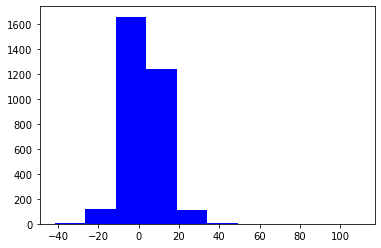

In [246]:
#Look at the distribution of values for employment growth rate
num_bins = 10
n,bins,patches = plt.hist(combined_ratings_df['Employment Growth Rate'],num_bins, facecolor = 'blue')
plt.show()
#Looks fairly normal/bell shaped
#Before fixing Kalawao numbers, chart was very skewed

## Clean/Preprocess Data for Regression

In [247]:
#Check for other null values in combined ratings dataframe
pd.set_option('display.max_rows', None)
combined_ratings_df.isnull().sum()


FIPS                                                     0
State                                                    0
County                                                   0
Deaths                                                 293
Years of Potential Life Lost Rate                      293
% Fair or Poor Health                                    0
Average Number of Physically Unhealthy Days              0
Average Number of Mentally Unhealthy Days                0
% Low Birthweight                                      107
% Smokers                                                0
% Adults with Obesity                                    0
Food Environment Index                                  19
% Physically Inactive                                    0
% With Access to Exercise Opportunities                  6
% Excessive Drinking                                     0
% Driving Deaths with Alcohol Involvement               35
Chlamydia Rate                                         1

In [ ]:
#On the county health rankings website, they state if measures do not show up in their data, it's because
#there was no data available for some states for that measure. Therefore, it seems reasonable to me to mostly
#replace null values with average values
#Think about how it will affect values for 4 provider ratio fields
#Makes sense for rates but not for straight up numbers, right? except that a zero will truly change the average
#and insertion of an average value will make it not change in total

In [253]:
#Verify that null values do decrease average/mean values in python calculations
#straight calculation with mean method
combined_ratings_df['% Low Birthweight'].mean()

8.146293245469522

In [258]:
#Manual calculation
count = combined_ratings_df['% Low Birthweight'].count()
sum = combined_ratings_df['% Low Birthweight'].sum()
print(f'A manual calculation of the mean value yields {sum}/{count} = {sum/count}.')

A manual calculation of the mean value yields 24724.0/3035 = 8.146293245469522.


In [208]:

combined_ratings_df.dtypes

FIPS                                                    int64
State                                                  object
County                                                 object
Deaths                                                float64
Years of Potential Life Lost Rate                     float64
% Fair or Poor Health                                   int64
Average Number of Physically Unhealthy Days           float64
Average Number of Mentally Unhealthy Days             float64
% Low Birthweight                                     float64
% Smokers                                               int64
% Adults with Obesity                                   int64
Food Environment Index                                float64
% Physically Inactive                                   int64
% With Access to Exercise Opportunities               float64
% Excessive Drinking                                    int64
% Driving Deaths with Alcohol Involvement             float64
Chlamydi

In [209]:
#Look at object type fields, decide if they should be converted to a number format for regression or omitted from dataset
combined_ratings_df.select_dtypes(include=['object']).columns

Index(['State', 'County', 'Primary Care Physicians Ratio', 'Dentist Ratio',
       'Mental Health Provider Ratio', 'Presence of Water Violation',
       'Other Primary Care Provider Ratio'],
      dtype='object')

In [ ]:
#State and county are categoric variables that do not work for linear regression and so should be omitted. PCP, Other PCP, 
#Dentist, and Mental Health Ratios seem to be a string of 3 numbers separated by colons, and first number indicates how many 
#people per provider, so for these three, we can keep the first number and eliminate the rest for the regression. Presence
#of water violation is a boolean, so we can convert those values to 0 and 1 for the regression

In [90]:
#Set output back to a small number of lines so showing a dataframe doesn't crash jupyter
pd.set_option('display.max_rows', 20)

## Linear Regression